***
# <font color=green size=10>**PROJETO DATA SCIENCE APLICADO À SAÚDE**</font>
***

### **01. Importação de bibliotecas necessárias para o projeto.**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
from IPython.display import display
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


### **02. Importação do banco de dados original.**

In [6]:
import pandas as pd

# Carregando o dataset
df = pd.read_csv('Dataset_13_02.csv')

# Exibindo as primeiras linhas para confirmar que os dados foram carregados corretamente
df.head()


,Região,Sexo,Idade,Data de Nascimento,Idade em Meses,Moradores que Alimentaram Acabamento (Sim),Moradores que Alimentaram Acabamento (Não),Tipo de Domicílio,Possui Cozinha,Ocupação,Situação do Registro,Presença de Tosse,Tipo de Respiração,Alimentos Básicos,Nivel Escolaridade,Beneficios,Faixa de Renda,Cor Pessoa
0,Norte,Masculino,1,11092017,22 meses,Sim,Não,Apartamento,Sim,Cedido de outra forma,Urbano,Sim,Não,"Sim, sempre",1°ano do ensino médio,A,"Até R$ 1.000,00",Branca
1,Norte,Feminino,4,6042015,51 meses,Sim,Não,Apartamento,Sim,Cedido de outra forma,Urbano,Sim,Não,"Sim, sempre",1°ano do ensino médio,A,"Até R$ 1.000,00",Branca
2,Norte,Feminino,2,21122016,30 meses,Sim,Sim,Casa,Sim,Cedido de outra forma,Urbano,Não,Não,"Sim, quase sempre",3°ano do ensino médio,A,"De R$ 1.001,00 até R$ 2.000,00",Branca
3,Norte,Masculino,4,13112014,56 meses,Sim,Sim,Casa,Sim,Cedido de outra forma,Urbano,Não,Não,"Sim, quase sempre",3°ano do ensino médio,A,"De R$ 1.001,00 até R$ 2.000,00","Parda (mulata, cabocla, cafuza, mameluca ou me..."
4,Norte,Feminino,0,2092018,10 meses,Sim,Não,Casa,Não,Próprio de algum morador - já pago,Urbano,Sim,Não,"Sim, quase sempre",2ª série/ 3°ano do ensino fundamental,EF,"De R$ 1.001,00 até R$ 2.000,00",Branca


In [7]:
for coluna in df.select_dtypes(include="object").columns:  # Apenas colunas categóricas (strings)
    print(f"\nContagem para {coluna}:")
    print(df[coluna].value_counts())



Contagem para Região:
Região
Centro-Oeste    3141
Sudeste         3118
Sul             2841
Nordeste        2766
Norte           2692
Name: count, dtype: int64

Contagem para Sexo:
Sexo
Masculino    7409
Feminino     7149
Name: count, dtype: int64

Contagem para Idade em Meses:
Idade em Meses
3 meses     368
4 meses     364
2 meses     359
5 meses     328
1 mês       327
16 meses    267
36 meses    265
12 meses    264
39 meses    263
46 meses    262
59 meses    260
48 meses    259
20 meses    256
8 meses     255
23 meses    250
25 meses    248
11 meses    247
45 meses    246
19 meses    245
17 meses    245
55 meses    244
49 meses    244
21 meses    243
15 meses    242
22 meses    241
27 meses    239
24 meses    239
29 meses    238
6 meses     238
51 meses    236
13 meses    235
18 meses    235
43 meses    235
34 meses    235
35 meses    230
31 meses    230
41 meses    230
10 meses    230
9 meses     227
56 meses    226
33 meses    226
14 meses    224
40 meses    223
42 meses    222
3

### **03. Pré-processamento dos dados para produzir o banco de dados para análise exploratória.**

In [8]:
# Contagem de dados faltantes em cada coluna
faltantes = df.isnull().sum()
print("Dados faltantes por coluna:")
print(faltantes)


Dados faltantes por coluna:
Região                                          0
Sexo                                            0
Idade                                           0
Data de Nascimento                              0
Idade em Meses                                  0
Moradores que Alimentaram Acabamento (Sim)      0
Moradores que Alimentaram Acabamento (Não)      0
Tipo de Domicílio                               0
Possui Cozinha                                  0
Ocupação                                        0
Situação do Registro                            0
Presença de Tosse                               0
Tipo de Respiração                              0
Alimentos Básicos                             396
Nivel Escolaridade                              0
Beneficios                                      0
Faixa de Renda                                  0
Cor Pessoa                                      0
dtype: int64


In [9]:
# Removendo as linhas que possuem qualquer valor faltante
df_clean = df.dropna()

# Verificando novamente os dados faltantes
print("Após remoção, dados faltantes por coluna:")
print(df_clean.isnull().sum())


Após remoção, dados faltantes por coluna:
Região                                        0
Sexo                                          0
Idade                                         0
Data de Nascimento                            0
Idade em Meses                                0
Moradores que Alimentaram Acabamento (Sim)    0
Moradores que Alimentaram Acabamento (Não)    0
Tipo de Domicílio                             0
Possui Cozinha                                0
Ocupação                                      0
Situação do Registro                          0
Presença de Tosse                             0
Tipo de Respiração                            0
Alimentos Básicos                             0
Nivel Escolaridade                            0
Beneficios                                    0
Faixa de Renda                                0
Cor Pessoa                                    0
dtype: int64


In [10]:
# Mapeamento de benefícios
beneficio_map = {
    "A": "Programa Bolsa Família (PBF)",
    "B": "Benefício de Prestação Continuada (BPC/LOAS)",
    "C": "Bolsa ou benefício da Prefeitura Municipal",
    "D": "Bolsa ou benefício do Governo do Estado",
    "E": "Pensão",
    "F": "Aposentadoria",
    "G": "Outro benefício"
}

# Remover espaços extras dos valores na coluna 'Beneficios'
df["Beneficios"] = df["Beneficios"].astype(str).str.strip()

# Criar colunas binárias para cada benefício
for codigo in beneficio_map.keys():
    df[f"Beneficio_{codigo}"] = df["Beneficios"].apply(lambda x: 1 if codigo in x else 0)

# Criar uma coluna com a contagem total de benefícios por indivíduo
df["Total_Beneficios"] = df[[f"Beneficio_{codigo}" for codigo in beneficio_map.keys()]].sum(axis=1)

# Exibir as primeiras linhas do dataset transformado
print(df.head())

mapeamento = {
    "Região": {"Norte": 1, "Nordeste": 2, "Sudeste": 3, "Sul": 4, "Centro-Oeste": 5},
    "Sexo": {"Masculino": 1, "Feminino": 2},
    "Tipo de Domicílio": {"Casa": 1, "Apartamento": 2, "Outros": 3},
    "Possui Cozinha": {"Sim": 1, "Não": 0},
    "Ocupação": {"Próprio de algum morador - já pago": 1, "Próprio de algum morador - ainda pagando": 2,
                 "Alugado": 3, "Cedido por empregador": 4, "Cedido de outra forma": 5, "Outra condição": 6},
    "Situação do Registro": {"Urbano": 1, "Rural": 2},
    "Presença de Tosse": {"Sim": 1, "Não": 2, "Não sabe/ não quis responder": 9},
    "Tipo de Respiração": {"Sim": 1, "Não": 2, "Não sabe/ não quis responder": 9},
    "Alimentos Básicos": {"Não": 1, "Sim, raramente": 2, "Sim, às vezes": 3, "Sim, quase sempre": 4,
                          "Sim, sempre": 5, "Não se cozinha em casa": 6},
    "Nivel Escolaridade": {
        "Sem estudo": 0,
        "1° ano do ensino fundamental": 1,
        "1ª série/ 2°ano do ensino fundamental": 2,
        "2ª série/ 3°ano do ensino fundamental": 3,
        "3ª série/ 4°ano do ensino fundamental": 4,
        "4ª série/ 5°ano do ensino fundamental": 5,
        "5ª série/ 6°ano do ensino fundamental": 6,
        "6ª série/ 7°ano do ensino fundamental": 7,
        "7ª série/ 8°ano do ensino fundamental": 8,
        "8ª série/ 9°ano do ensino fundamental": 9,
        "1°ano do ensino médio": 10,
        "2°ano do ensino médio": 11,
        "3°ano do ensino médio": 12,
        "Ensino superior incompleto": 13,
        "Ensino superior completo": 14
    },
    "Faixa de Renda": {
        "Sem renda": 1, "Até R$ 1.000,00": 2, "De R$ 1.001,00 até R$ 2.000,00": 3,
        "De R$ 2.001,00 até R$ 3.000,00": 4, "De R$ 3.001,00 até R$ 5.000,00": 5,
        "De R$ 5.001,00 até R$ 10.000,00": 6, "R$ 10.001,00 ou mais": 7
    },
    "Cor Pessoa": {
        "Branca": 1,
        "Preta": 2,
        "Amarela (origem japonesa, chinesa, coreana etc.)": 3,
        "Parda (mulata, cabocla, cafuza, mameluca ou mestiça)": 4,
        "Indígena": 5,
        "Não sabe/não quis responder": 9
    },
    "Moradores que Alimentaram Acabamento (Sim)": {
        "Sim": 1, "Não": 2
    },
    "Moradores que Alimentaram Acabamento (Não)":{
        "Sim": 1, "Não": 2
    }
}

# Substituir valores da coluna "Idade em Meses", removendo a palavra "meses" e convertendo para número
coluna_idade_meses = "Idade em Meses"

# Verificar se a coluna existe no dataset antes de aplicar a transformação
if coluna_idade_meses in df.columns:
    df[coluna_idade_meses] = df[coluna_idade_meses].astype(str).str.replace("meses", "").str.strip()
    df[coluna_idade_meses] = pd.to_numeric(df[coluna_idade_meses], errors="coerce")  # Converter para número

# Exibir o mapeamento completo
mapeamento

  Região       Sexo  Idade  Data de Nascimento Idade em Meses  \
0  Norte  Masculino      1            11092017       22 meses   
1  Norte   Feminino      4             6042015       51 meses   
2  Norte   Feminino      2            21122016       30 meses   
3  Norte  Masculino      4            13112014       56 meses   
4  Norte   Feminino      0             2092018       10 meses   

  Moradores que Alimentaram Acabamento (Sim)  \
0                                        Sim   
1                                        Sim   
2                                        Sim   
3                                        Sim   
4                                        Sim   

  Moradores que Alimentaram Acabamento (Não) Tipo de Domicílio Possui Cozinha  \
0                                        Não       Apartamento            Sim   
1                                        Não       Apartamento            Sim   
2                                        Sim              Casa            Sim

{'Região': {'Norte': 1,
  'Nordeste': 2,
  'Sudeste': 3,
  'Sul': 4,
  'Centro-Oeste': 5},
 'Sexo': {'Masculino': 1, 'Feminino': 2},
 'Tipo de Domicílio': {'Casa': 1, 'Apartamento': 2, 'Outros': 3},
 'Possui Cozinha': {'Sim': 1, 'Não': 0},
 'Ocupação': {'Próprio de algum morador - já pago': 1,
  'Próprio de algum morador - ainda pagando': 2,
  'Alugado': 3,
  'Cedido por empregador': 4,
  'Cedido de outra forma': 5,
  'Outra condição': 6},
 'Situação do Registro': {'Urbano': 1, 'Rural': 2},
 'Presença de Tosse': {'Sim': 1, 'Não': 2, 'Não sabe/ não quis responder': 9},
 'Tipo de Respiração': {'Sim': 1, 'Não': 2, 'Não sabe/ não quis responder': 9},
 'Alimentos Básicos': {'Não': 1,
  'Sim, raramente': 2,
  'Sim, às vezes': 3,
  'Sim, quase sempre': 4,
  'Sim, sempre': 5,
  'Não se cozinha em casa': 6},
 'Nivel Escolaridade': {'Sem estudo': 0,
  '1° ano do ensino fundamental': 1,
  '1ª série/ 2°ano do ensino fundamental': 2,
  '2ª série/ 3°ano do ensino fundamental': 3,
  '3ª série/ 4°ano 

In [11]:
# Aplicar os mapeamentos no dataset
for coluna, mapping in mapeamento.items():
    if coluna in df.columns:
        df[coluna] = df[coluna].map(mapping)

# Exibir uma amostra do dataset transformado
print(df.head())


   Região  Sexo  Idade  Data de Nascimento  Idade em Meses  \
0       1     1      1            11092017            22.0   
1       1     2      4             6042015            51.0   
2       1     2      2            21122016            30.0   
3       1     1      4            13112014            56.0   
4       1     2      0             2092018            10.0   

   Moradores que Alimentaram Acabamento (Sim)  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   Moradores que Alimentaram Acabamento (Não)  Tipo de Domicílio  \
0                                           2                2.0   
1                                           2                2.0   
2                                           1                1.0   
3                                           1               

In [12]:
faltantes = df.isnull().sum()
print("Dados faltantes por coluna:")
print(faltantes)


Dados faltantes por coluna:
Região                                          0
Sexo                                            0
Idade                                           0
Data de Nascimento                              0
Idade em Meses                                327
Moradores que Alimentaram Acabamento (Sim)      0
Moradores que Alimentaram Acabamento (Não)      0
Tipo de Domicílio                             615
Possui Cozinha                                  0
Ocupação                                        0
Situação do Registro                            0
Presença de Tosse                              16
Tipo de Respiração                             15
Alimentos Básicos                             396
Nivel Escolaridade                              0
Beneficios                                      0
Faixa de Renda                                  0
Cor Pessoa                                      0
Beneficio_A                                     0
Beneficio_B           

In [13]:
df.sample(5)

,Região,Sexo,Idade,Data de Nascimento,Idade em Meses,Moradores que Alimentaram Acabamento (Sim),Moradores que Alimentaram Acabamento (Não),Tipo de Domicílio,Possui Cozinha,Ocupação,...,Faixa de Renda,Cor Pessoa,Beneficio_A,Beneficio_B,Beneficio_C,Beneficio_D,Beneficio_E,Beneficio_F,Beneficio_G,Total_Beneficios
10567,4,1,3,7072015,46.0,1,1,1.0,1,5,...,3,1,0,0,0,0,0,0,0,0
12024,5,2,4,12082014,58.0,2,2,1.0,1,5,...,2,4,0,0,0,0,0,0,0,0
12306,5,2,0,28122018,8.0,2,2,1.0,0,5,...,3,2,0,0,0,0,0,0,0,0
9668,4,2,2,22032017,26.0,2,2,1.0,1,3,...,5,1,0,0,0,0,0,0,0,0
13383,5,1,1,15112018,15.0,1,1,1.0,1,1,...,2,1,0,0,0,0,0,0,0,0


In [14]:
df = df.loc[:, ~df.columns.duplicated()]
#Processar a coluna de data (se houver)
if 'Data de Nascimento' in df.columns:
    df['Data de Nascimento'] = pd.to_datetime(df['Data de Nascimento'], errors='coerce')
    # Exemplo: extrair o ano e o mês (se fizer sentido para seu modelo)
    df['Ano_Nasc'] = df['Data de Nascimento'].dt.year
    df['Mes_Nasc'] = df['Data de Nascimento'].dt.month
    # Opcional: remover a coluna original de data
    df.drop(columns=['Data de Nascimento'], inplace=True)


In [15]:
from sklearn.model_selection import train_test_split

target = 'Alimentos Básicos'
if target not in df.columns:
    raise ValueError(f"A coluna target '{target}' não foi encontrada no dataset. Verifique os nomes das colunas.")

X = df.drop(columns=[target])
y = df[target]

# 7. Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Treinar um modelo preditivo (RandomForestClassifier neste exemplo)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 9. Avaliar o modelo
y_pred = clf.predict(X_test)
print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

ValueError: could not convert string to float: ''

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Classes Preditas')
plt.ylabel('Classes Reais')
plt.title('Matriz de Confusão')
plt.show()


NameError: name 'y_pred' is not defined

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Seleciona uma árvore do RandomForest
estimator = clf.estimators_[0]

plt.figure(figsize=(20, 10))
tree.plot_tree(estimator, filled=True, feature_names=X.columns, class_names=[str(c) for c in clf.classes_], rounded=True)
plt.title('Visualização de uma Árvore do RandomForest')
plt.show()


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [16]:
import plotly.graph_objects as go

# Suponha que você tenha as métricas para cada classe
categorias = ['Precisão', 'Recall', 'F1-Score']
classe_0 = [0.65, 0.60, 0.62]  # Exemplo para classe 0
classe_1 = [0.62, 0.64, 0.63]  # Exemplo para classe 1

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=classe_0,
    theta=categorias,
    fill='toself',
    name='Classe 0'
))

fig.add_trace(go.Scatterpolar(
    r=classe_1,
    theta=categorias,
    fill='toself',
    name='Classe 1'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title="Gráfico de Radar das Métricas de Performance"
)

fig.show()


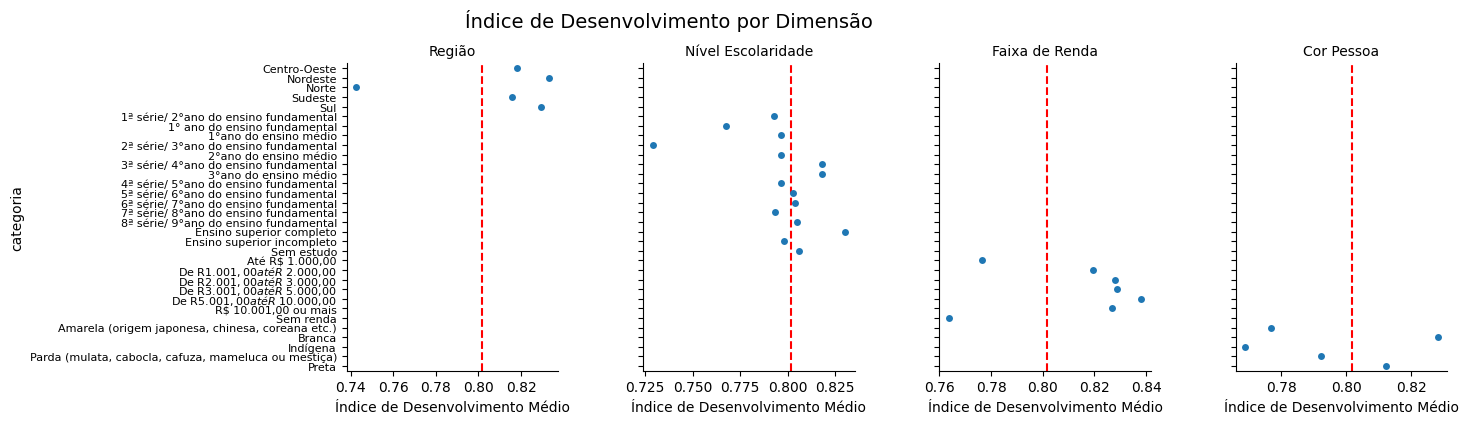

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Ler o dataset (ajuste o caminho/nome do arquivo conforme necessário)
df = pd.read_csv("/content/Dataset_13_02.csv")

# ------------------------------------------------------------------------------
# 2) RECODIFICAR AS COLUNAS PARA CRIAR INDICADORES (SCORES)
# Exemplo: "Alimentos Básicos", "Presença de Tosse" e "Possui Cozinha"
# ------------------------------------------------------------------------------

# Função para recodificar "Alimentos Básicos"
def recode_alimentos(valor):
    if isinstance(valor, str):
        if "Sim, sempre" in valor:
            return 1.0
        elif "Sim, quase sempre" in valor:
            return 0.5
    return 0.0

df['alimentos_score'] = df['Alimentos Básicos'].apply(recode_alimentos)

# Função para recodificar "Presença de Tosse"
def recode_tosse(valor):
    if isinstance(valor, str):
        val = valor.strip().lower()
        if val == "não":
            return 1.0  # Sem tosse = melhor
        elif val == "sim":
            return 0.0  # Com tosse = pior
    return 0.0

df['tosse_score'] = df['Presença de Tosse'].apply(recode_tosse)

# Função para recodificar "Possui Cozinha"
def recode_cozinha(valor):
    if isinstance(valor, str):
        val = valor.strip().lower()
        if val == "sim":
            return 1.0
        elif val == "não":
            return 0.0
    return 0.0

df['cozinha_score'] = df['Possui Cozinha'].apply(recode_cozinha)

# ------------------------------------------------------------------------------
# 3) CALCULAR O ÍNDICE DE DESENVOLVIMENTO (MÉDIA DOS SCORES)
# ------------------------------------------------------------------------------
df['indice_desenvolvimento'] = df[['alimentos_score', 'tosse_score', 'cozinha_score']].mean(axis=1)

# ------------------------------------------------------------------------------
# 4) AGRUPAR POR REGIÃO, NÍVEL ESCOLARIDADE, FAIXA DE RENDA E COR PESSOA
#    E CALCULAR A MÉDIA DO ÍNDICE
# ------------------------------------------------------------------------------
resultados = []

# (a) Agrupamento por Região
df_regiao = df.groupby('Região')['indice_desenvolvimento'].mean().reset_index()
df_regiao['dimensao'] = 'Região'
df_regiao.rename(columns={'Região': 'categoria', 'indice_desenvolvimento': 'indice_medio'}, inplace=True)
resultados.append(df_regiao)

# (b) Agrupamento por Nível Escolaridade
df_escolaridade = df.groupby('Nivel Escolaridade')['indice_desenvolvimento'].mean().reset_index()
df_escolaridade['dimensao'] = 'Nível Escolaridade'
df_escolaridade.rename(columns={'Nivel Escolaridade': 'categoria', 'indice_desenvolvimento': 'indice_medio'}, inplace=True)
resultados.append(df_escolaridade)

# (c) Agrupamento por Faixa de Renda
df_renda = df.groupby('Faixa de Renda')['indice_desenvolvimento'].mean().reset_index()
df_renda['dimensao'] = 'Faixa de Renda'
df_renda.rename(columns={'Faixa de Renda': 'categoria', 'indice_desenvolvimento': 'indice_medio'}, inplace=True)
resultados.append(df_renda)

# (d) Agrupamento por Cor Pessoa
df_cor = df.groupby('Cor Pessoa')['indice_desenvolvimento'].mean().reset_index()
df_cor['dimensao'] = 'Cor Pessoa'
df_cor.rename(columns={'Cor Pessoa': 'categoria', 'indice_desenvolvimento': 'indice_medio'}, inplace=True)
resultados.append(df_cor)

# Concatena todos os dataframes de resultados em um só
df_final = pd.concat(resultados, ignore_index=True)

# ------------------------------------------------------------------------------
# 5) GERAR O GRÁFICO FACETADO (UM PAINEL PARA CADA DIMENSÃO)
#    COM AJUSTES DE LAYOUT PARA MELHOR LEGIBILIDADE
# ------------------------------------------------------------------------------
# Calcula a média geral do índice médio (opcional, para linha de referência)
media_geral = df_final['indice_medio'].mean()

# Cria o catplot
g = sns.catplot(
    data=df_final,
    x='indice_medio',
    y='categoria',
    col='dimensao',
    kind='strip',    # pode trocar para 'point', 'swarm', etc.
    height=4,
    sharex=False     # cada faceta (dimensão) terá seu próprio range de x
)

# Ajusta o título de cada faceta para mostrar só o nome da dimensão
g.set_titles("{col_name}")

# Para cada eixo (faceta), adiciona linha de referência e formata o visual
for ax in g.axes.flat:
    ax.axvline(media_geral, linestyle='--', color='red')  # linha média geral
    ax.set_xlabel("Índice de Desenvolvimento Médio")
    ax.tick_params(axis='y', labelsize=8)                 # diminui fonte das categorias

# Aumenta a margem esquerda (left=0.3) e o espaço horizontal entre facetas (wspace=0.4)
plt.subplots_adjust(left=0.3, wspace=0.4)

# Título geral do gráfico
plt.suptitle("Índice de Desenvolvimento por Dimensão", y=1.05, fontsize=14)

plt.show()


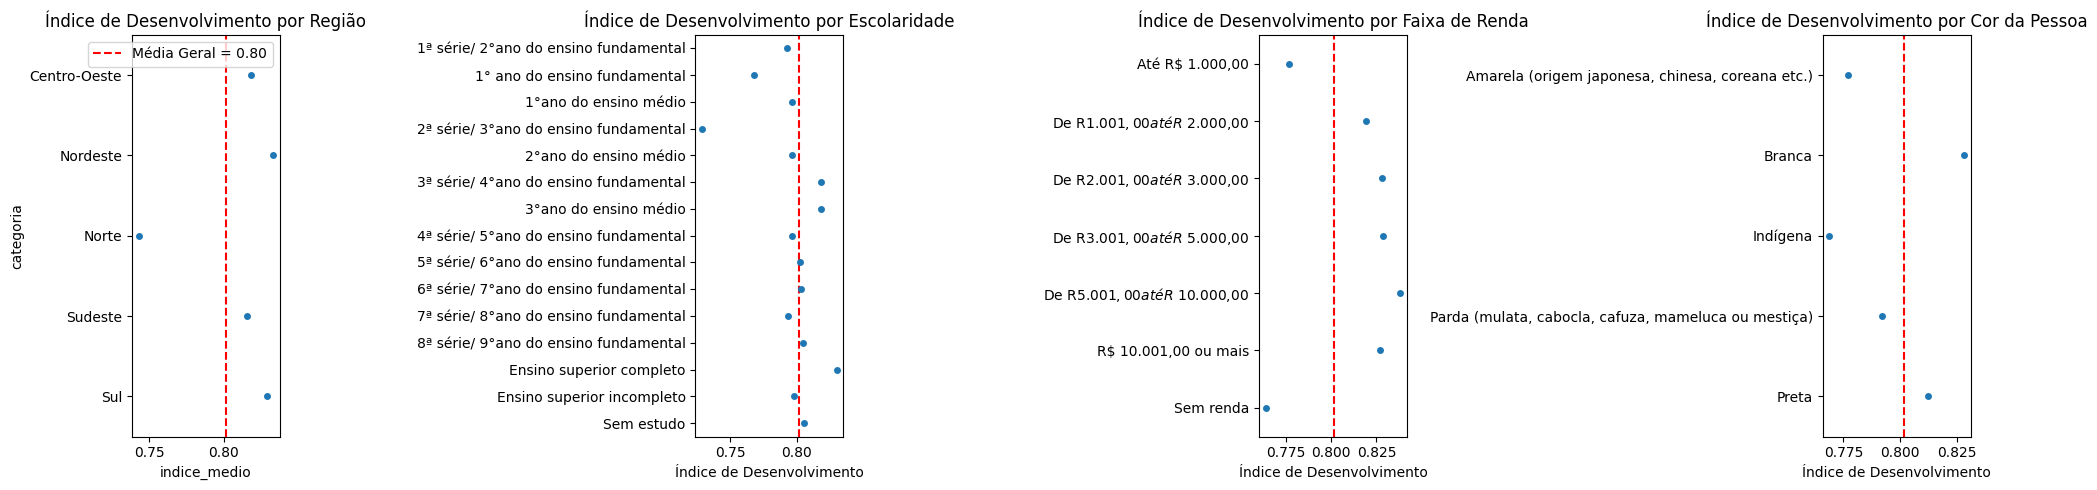

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <-- A parte de leitura, recodificação e criação de df_final continua a mesma -->
# df_final tem colunas: [categoria, indice_medio, dimensao]

# 1) Calcular a média geral para desenhar a linha de referência
media_geral = df_final['indice_medio'].mean()

# 2) Filtrar cada dimensão separadamente
df_regiao = df_final.query("dimensao == 'Região'")
df_escolaridade = df_final.query("dimensao == 'Nível Escolaridade'")
df_renda = df_final.query("dimensao == 'Faixa de Renda'")
df_cor = df_final.query("dimensao == 'Cor Pessoa'")

# 3) Criar subplots (4 colunas, pois são 4 dimensões)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=False, sharey=False)

# --- (a) REGIÃO ---
sns.stripplot(
    data=df_regiao,
    x='indice_medio',
    y='categoria',
    ax=axes[0]
)
axes[0].set_title("Índice de Desenvolvimento por Região")
axes[0].axvline(media_geral, linestyle='--', color='red', label=f'Média Geral = {media_geral:.2f}')
axes[0].legend()

# --- (b) NÍVEL ESCOLARIDADE ---
sns.stripplot(
    data=df_escolaridade,
    x='indice_medio',
    y='categoria',
    ax=axes[1]
)
axes[1].set_title("Índice de Desenvolvimento por Escolaridade")
axes[1].axvline(media_geral, linestyle='--', color='red')
axes[1].set_ylabel("")  # remove label do eixo y se quiser
axes[1].set_xlabel("Índice de Desenvolvimento")

# --- (c) FAIXA DE RENDA ---
sns.stripplot(
    data=df_renda,
    x='indice_medio',
    y='categoria',
    ax=axes[2]
)
axes[2].set_title("Índice de Desenvolvimento por Faixa de Renda")
axes[2].axvline(media_geral, linestyle='--', color='red')
axes[2].set_ylabel("")
axes[2].set_xlabel("Índice de Desenvolvimento")

# --- (d) COR DA PESSOA ---
sns.stripplot(
    data=df_cor,
    x='indice_medio',
    y='categoria',
    ax=axes[3]
)
axes[3].set_title("Índice de Desenvolvimento por Cor da Pessoa")
axes[3].axvline(media_geral, linestyle='--', color='red')
axes[3].set_ylabel("")
axes[3].set_xlabel("Índice de Desenvolvimento")

# Ajustes gerais de layout
plt.tight_layout()
plt.show()


In [2]:
!pip install squarify


In [4]:
import squarify
import matplotlib.pyplot as plt

# Extraia quais dimensões existem (Região, Nível Escolaridade, etc.)
dimensoes = df_final['dimensao'].unique()

fig, axes = plt.subplots(1, len(dimensoes), figsize=(5 * len(dimensoes), 5))

for ax, dim in zip(axes, dimensoes):
    # Filtra somente aquela dimensão
    data_dim = df_final[df_final['dimensao'] == dim]

    # 'sizes' será usado para controlar o tamanho dos retângulos
    sizes = data_dim['indice_medio']
    # 'label' será o texto que aparece em cada retângulo
    labels = data_dim['categoria'] + "\n(" + data_dim['indice_medio'].round(2).astype(str) + ")"

    # Plot do treemap
    squarify.plot(sizes=sizes, label=labels, alpha=0.7, ax=ax)
    ax.axis('off')
    ax.set_title(dim)

plt.suptitle("Treemap - Índice de Desenvolvimento por Dimensão", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


NameError: name 'df_final' is not defined

In [ ]:
##############################################
# 0. Importação das bibliotecas necessárias
##############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

##############################################
# 1. Carregamento e pré-processamento do dataset
##############################################
df = pd.read_csv('Dataset_13_02.csv')
df = df.dropna()

# Exemplo de mapeamento para a coluna "Região"
mapeamento_regiao = {"Norte": 1, "Nordeste": 2, "Sudeste": 3, "Sul": 4, "Centro-Oeste": 5}
if 'Região' in df.columns:
    df['Região'] = df['Região'].map(mapeamento_regiao)

# Outras transformações/mapeamentos que você já utiliza podem ser aplicados aqui

##############################################
# 2. Separação do dataframe em dados de teste e treino
##############################################
target = 'Alimentos Básicos'
if target not in df.columns:
    raise ValueError(f"A coluna target '{target}' não foi encontrada no dataset.")

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##############################################
# 3. Pré-processamento: One-hot encoding das colunas categóricas
##############################################
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Colunas categóricas:", categorical_cols.tolist())

X_train_enc = pd.get_dummies(X_train, columns=categorical_cols)
X_test_enc = pd.get_dummies(X_test, columns=categorical_cols)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)
X_train_enc = X_train_enc.fillna(0)
X_test_enc = X_test_enc.fillna(0)

##############################################
# 3.1. Aplicar SMOTE para balancear as classes no conjunto de treino
##############################################
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_enc, y_train)
print("Distribuição das classes após SMOTE:")
print(pd.Series(y_train_bal).value_counts())

##############################################
# 4. Criação e treinamento do modelo de IA
##############################################
# Usar class_weight="balanced" para ajudar com o desbalanceamento
modelo_inicial = RandomForestClassifier(random_state=42, class_weight="balanced")
modelo_inicial.fit(X_train_bal, y_train_bal)

y_pred_inicial = modelo_inicial.predict(X_test_enc)
print("### Métricas do Modelo Inicial ###")
print("Acurácia:", accuracy_score(y_test, y_pred_inicial))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_inicial))

##############################################
# 4.3. GridSearchCV para encontrar melhores hiperparâmetros
##############################################
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_bal, y_train_bal)
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

##############################################
# 4.4. Treinamento do modelo com os melhores hiperparâmetros
##############################################
modelo_otimizado = RandomForestClassifier(**grid_search.best_params_, random_state=42, class_weight="balanced")
modelo_otimizado.fit(X_train_bal, y_train_bal)

y_pred_otimizado = modelo_otimizado.predict(X_test_enc)
print("### Métricas do Modelo Otimizado ###")
print("Acurácia:", accuracy_score(y_test, y_pred_otimizado))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_otimizado))

##############################################
# 5. Demonstração de uso do modelo com um dado novo
##############################################
novo_dado = {
    'Região': 'Centro-Oeste',
    'Sexo': 'Masculino',
    'Tipo de Domicílio': 'Casa',
    'Possui Cozinha': 'Sim',
    'Idade em Meses': 360,
    'Moradores que Alimentaram Acabamento (Sim)': 'Sim',
    'Moradores que Alimentaram Acabamento (Não)': 'Não',
    'Ocupação': 'Alugado',
    'Situação do Registro': 'Urbano',
    'Presença de Tosse': 'Não',
    'Tipo de Respiração': 'Não',
    'Nivel Escolaridade': 'Ensino superior completo',
    'Beneficios': 'A',
    'Faixa de Renda': 'De R$ 3.001,00 até R$ 5.000,00',
    'Cor Pessoa': 'Branca'
}

novo_exemplo = pd.DataFrame([novo_dado])
if 'Região' in novo_exemplo.columns:
    novo_exemplo['Região'] = novo_exemplo['Região'].map(mapeamento_regiao)

novo_exemplo_enc = pd.get_dummies(novo_exemplo, columns=categorical_cols)
novo_exemplo_enc = novo_exemplo_enc.reindex(columns=X_train_enc.columns, fill_value=0)

predicao_novo = modelo_otimizado.predict(novo_exemplo_enc)
print("Previsão para o novo dado:", predicao_novo[0])


Colunas categóricas: ['Sexo', 'Idade em Meses', 'Moradores que Alimentaram Acabamento (Sim)', 'Moradores que Alimentaram Acabamento (Não)', 'Tipo de Domicílio', 'Possui Cozinha', 'Ocupação', 'Situação do Registro', 'Presença de Tosse', 'Tipo de Respiração', 'Nivel Escolaridade', 'Beneficios', 'Faixa de Renda', 'Cor Pessoa']
Distribuição das classes após SMOTE:
Alimentos Básicos
Sim, sempre          9902
Sim, às vezes        9902
Sim, quase sempre    9902
Sim, raramente       9902
Não                  9902
Name: count, dtype: int64
### Métricas do Modelo Inicial ###
Acurácia: 0.8690434168725732
Relatório de Classificação:
                    precision    recall  f1-score   support

              Não       0.00      0.00      0.00        10
Sim, quase sempre       0.20      0.01      0.01       278
   Sim, raramente       0.00      0.00      0.00        14
      Sim, sempre       0.87      1.00      0.93      2468
    Sim, às vezes       0.00      0.00      0.00        63

         accur

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



KeyboardInterrupt: 

In [ ]:
# ### 03. Separação do dataframe em dados de teste e de treino ou outra organização necessária

# Exemplo: Criar uma variável target binária: 1 se o indivíduo possui pelo menos um benefício, 0 caso contrário.
df['Target'] = (df['Total_Beneficios'] > 0).astype(int)

# Definir as features (excluindo colunas que não serão usadas, como textos ou o próprio target)
# Aqui, por exemplo, removemos a coluna "Beneficios" que é o texto original
features = df.drop(columns=['Beneficios', 'Target'])
target = df['Target']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# ### 04. Criação do modelo de IA

# #### 4.1. Treinamento do modelo sem ajustes de hiperparâmetros
from sklearn.ensemble import RandomForestClassifier

# Inicializando o modelo com parâmetros padrão
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# #### 4.2. Impressão das métricas de qualidade do modelo
from sklearn.metrics import accuracy_score, classification_report

# Predições no conjunto de teste
y_pred = modelo.predict(X_test)

print("Métricas do modelo sem ajuste de hiperparâmetros:")
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# #### 4.3. Utilização de técnica para identificação dos melhores hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Definindo o grid de parâmetros para o Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Configurando o GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# #### 4.4. Treinamento do modelo com os melhores hiperparâmetros
modelo_aprimorado = grid_search.best_estimator_
modelo_aprimorado.fit(X_train, y_train)

# #### 4.5. Impressão das métricas de qualidade do modelo aperfeiçoado
y_pred_aprimorado = modelo_aprimorado.predict(X_test)

print("Métricas do modelo aprimorado:")
print("Acurácia:", accuracy_score(y_test, y_pred_aprimorado))
print(classification_report(y_test, y_pred_aprimorado))

# ### 05. Demonstração de uso do modelo com um dado novo

# Exemplo: utilizando um registro do próprio conjunto de teste (ou você pode criar um registro manualmente)
novo_dado = X_test.iloc[0].copy()  # Pega um exemplo dos dados de teste
novo_dado = novo_dado.to_frame().T  # Converte para dataframe com uma única linha

print("Predição para o novo dado (0 = não recebe benefício, 1 = recebe benefício):")
print(modelo_aprimorado.predict(novo_dado))


KeyError: 'Total_Beneficios'